**Importing the required dependencies**

In [29]:
import pandas as pd
import numpy as np
import re  #regular expression lib
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sb
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

stopwords includes general english words which are used in day to day communication, we filter them out from our dataset


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**creating a single usable dataframe using pandas**

In [ ]:
dataset_1=pd.read_csv('/content/news_dataset.csv')
dataset_2=pd.read_csv('/content/train.csv')
dataset_1['label']=dataset_1['label'].replace({'FAKE':1,'REAL':0})
dataset_2['text']=dataset_2['author']+' '+dataset_2['title']
dataset_2.drop(columns='id',axis=1,inplace=True)
dataset_2.drop(columns='author',axis=1,inplace=True)
dataset_2.drop(columns='title',axis=1,inplace=True)
dataset_1=dataset_1[['text','label']]
dataset=pd.concat([dataset_1,dataset_2],axis=0,ignore_index=True)
dataset.shape


(24529, 2)

distribution of fake ,real data in dataset:
0:Real
1:Fake

<Axes: xlabel='label', ylabel='count'>

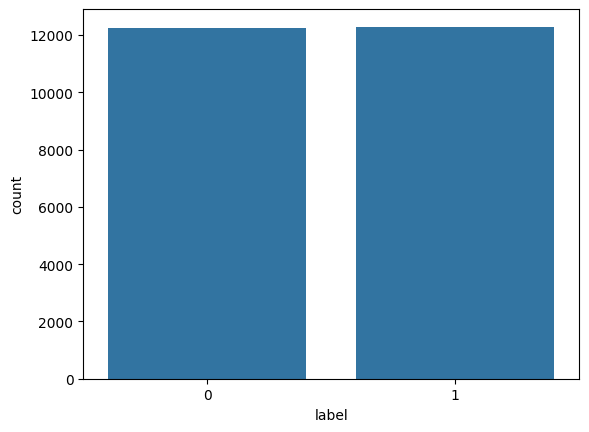

In [ ]:
sb.countplot(x='label',data=dataset)

dealing with null values if there are any


In [ ]:
dataset_1.isnull().sum()

,0
text,8
label,0


In [ ]:
dataset_2.isnull().sum()

,0
text,2515
label,0


since the dataset_1 is very small compared to dataset_2 and it having fewer null rows means that we can simply replace the null values by empty strings in the combined dataset as it cant be imputated

In [ ]:
dataset=dataset.fillna(' ')
dataset.isnull().sum()

,0
text,0
label,0


Stemming : to convert each word to its root word eg running->run

In [ ]:
port_stem = PorterStemmer()

In [ ]:
port_stem=PorterStemmer()
def stemming(text):
   stemmed_text=re.sub('[^a-zA-Z]',' ',text) #replaces all the characters not belonging in set(a-z,A-Z) like 1,2,@,! etc by ' '
   stemmed_text=stemmed_text.lower() #converting to lower alphabets
   stemmed_text=stemmed_text.split() #splitting each word to list
   stemmed_text=[port_stem.stem(word) for word in stemmed_text if not word in stopwords.words('english')] #stems each word which is not present in stopwords
   stemmed_text=' '.join(stemmed_text)
   return stemmed_text                     #joins and return the words


In [ ]:
dataset['text']=dataset['text'].apply(stemming)

In [ ]:
dataset.tail()

,text,label
24524,jerom hudson rapper trump poster child white s...,0
24525,benjamin hoffman n f l playoff schedul matchup...,0
24526,michael j de la merc rachel abram maci said re...,0
24527,alex ansari nato russia hold parallel exercis ...,1
24528,david swanson keep f aliv,1


separating the labels and features

In [ ]:
X=dataset['text'].values
Y=dataset['label'].values
print(X)
print(Y)

['payal accus filmmak anurag kashyap behav inappropri video went viral maintain stanc speak etim said want speak long time today final thought must get head tweet incid sometim ago metoo movement happen mani peopl told delet tweet els would stop get work manag advis remov tweet compli post anurag block whatsapp'
 'four minut long video woman criticis govern anti citizenship amend act ralli delhi earlier januari go viral fals claim woman show late prime minist atal bihari vajpaye niec caption hindi translat respect vajpaye ji niec final broken silenc listen say translat hindi also read muslim politician disguis hindu anti caa protest video come time protest citizenship amend act propos nation regist citizen gone unab month video woman seen say follow hindi british lot bad least outsid first land came afar came still differ indian govern british british educ illiter least british govern peopl understand indian talk india tell congress tell other tell us silent pakistan crazi talk pakista

**converting the textual data to numerical features using Tf-idf vectorizer**

In [ ]:
vectorizer=TfidfVectorizer()
vectorizer.fit_transform(X)
X=vectorizer.transform(X)
print(X)

  (0, 33359)	0.10895708278986842
  (0, 33316)	0.11326391015904376
  (0, 33010)	0.11663562411950007
  (0, 32955)	0.12104054279738966
  (0, 32716)	0.11255386396212862
  (0, 32358)	0.09498728294238552
  (0, 32214)	0.0922003564596238
  (0, 31007)	0.30809883585916586
  (0, 30479)	0.11288947766702609
  (0, 30441)	0.125533452488185
  (0, 30319)	0.05242498986753334
  (0, 30203)	0.14265589008156504
  (0, 28779)	0.12298375865950965
  (0, 28578)	0.17148187077690735
  (0, 28303)	0.2455650537415501
  (0, 28141)	0.14685959300175985
  (0, 25938)	0.08791908754035961
  (0, 24906)	0.13668098700146544
  (0, 23064)	0.09446290813304606
  (0, 22328)	0.09675357200601796
  (0, 22187)	0.15143650789494198
  (0, 19796)	0.14178641680974735
  (0, 19496)	0.14472983753053212
  (0, 18721)	0.16225068027840947
  (0, 17944)	0.10578617469361452
  :	:
  (24526, 25938)	0.1402379442308114
  (24526, 24623)	0.17690825123758475
  (24526, 24018)	0.2698120579581883
  (24526, 20451)	0.08573183396770596
  (24526, 18776)	0.18923254

splitting the data int test and train data with 20% data for testing and 80% for training

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2) #stratify is used to perform balanced distribution
                                                                                                  #random_state is used to decide the way of splitting data,different random_state will produce different results

**Training ML Models with our dataset**


1) Logistics Regression model

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_train_score=model.predict(X_train)
score_accu_train=accuracy_score(X_train_score,Y_train)
print("The train data accuracy score is ",score_accu_train)

The train data accuracy score is  0.9868521632777862


now testing with the test data

In [ ]:
X_test_score=model.predict(X_test)
score_accu_test=accuracy_score(X_test_score,Y_test)
print("The test data accuracy score is ",score_accu_test)

The test data accuracy score is  0.9792091316754994


2) Xgboost model

In [ ]:
model2 = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Evaluation metric
    use_label_encoder=False       # To suppress warning
)

# Train the model
model2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:26:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
score=model2.predict(X_train)
accu_score=accuracy_score(score,Y_train)
print("the train data score is: ",accu_score)

the train data score is:  0.9925597513122356


In [ ]:
score=model2.predict(X_test)
accu_score=accuracy_score(score,Y_test)
print("the test data score is: ",accu_score)

the test data score is:  0.987362413371382


3) Naive_bayes model

In [34]:
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)

MultinomialNB()

In [38]:
score3=nb_model.predict(X_train)
accu_score3=accuracy_score(score3,Y_train)
print("the train data score is: ",accu_score3)

the train data score is:  0.9778321357590583


In [39]:
score4=nb_model.predict(X_test)
accu_score4=accuracy_score(score4,Y_test)
print("the test data score is: ",accu_score4)

the test data score is:  0.9635140644109254


**System for user to input Articles and verify**

we have used three models with highest accuracy
and used a voting system for better predictions

the **Voting system** involves creating a list and storing predictions made by all three models

if the count of zeros in the list (0 represents real) is >=2 the program prints "news is REAL" else it prints "news might be FAKE"

In [43]:
def manual(user_input):
  data={'text':[user_input]}
  df=pd.DataFrame(data)
  df['text']=df['text'].apply(stemming)
  new_df=df['text']
  new_df=vectorizer.transform(new_df)
  prediction=model.predict(new_df)
  prediction2=model2.predict(new_df)
  fianl_predictions=[model.predict(new_df),model2.predict(new_df),nb_model.predict(new_df)]
  if (fianl_predictions.count(0)>=2):
     return 0
  else:
     return 1

inp=input("Enter article: ")
ans=manual(inp)
if(ans==0):
  print("news is REAL")
else:
  print("news might be FAKE")

Enter article: "New Electric Vehicle Battery Technology Boosts Range by 50%" - September 15, 2024 A major automotive company has announced a breakthrough in electric vehicle (EV) battery technology. The new battery, developed in partnership with leading researchers, offers a 50% increase in driving range compared to current models. This advancement is expected to make EVs more practical for long-distance travel and contribute to the shift toward sustainable transportation
news might be FAKE
